<a href="https://colab.research.google.com/github/fabiohsst/air_passengers_forecast/blob/main/air_passenger_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air passengers forecast using linear regression

That project aims predict the number of passengers in a flight based on previous 144 flights, from 1944 to 1960 in an anonymous flight company.
The main goal is test the numpy and sklearn libraries, applying linear regression, testing the functions to prepare, apply and test the predictions accuracy.

The analyse process will be splited out in 3 phases:


*   Understanding the dataset
*   Preparing the dataset
*   Applying and testing the regression


                       

## Understanding the dataset

In [2]:
import pandas as pd

In [3]:
# loading dataset from github
passengers = pd.read_csv('https://raw.githubusercontent.com/fabiohsst/air_passengers_forecast/main/Passageiros.csv')
passengers.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
# Changing columns name from Portuguese to English
passengers = passengers.rename(columns={'tempo': 'time', 'nPassageiros': 'nPassengers'})
passengers.head()

,time,nPassengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [5]:
print("The dataset lenght is", len(passengers))
print("The earliest date is", passengers["time"].min())
print("The latest date is", passengers["time"].max())

The dataset lenght is 144
The earliest date is 1949.0
The latest date is 1960.91666666667


In [6]:
#Importing libraries to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

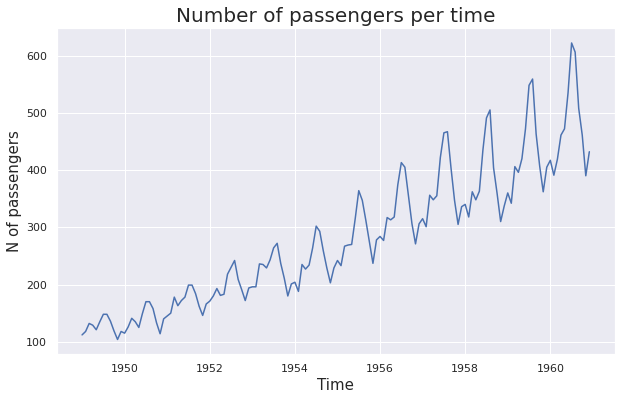

In [7]:
# Plotting a lineplot graph
plt.figure(figsize = (10,6))
sns.set(font_scale=1)
ax = sns.lineplot(x="time", y="nPassengers", data=passengers)
ax.axes.set_title("Number of passengers per time",fontsize=20)
ax.set_xlabel("Time",fontsize=15)
ax.set_ylabel("N of passengers",fontsize=15)
plt.show()

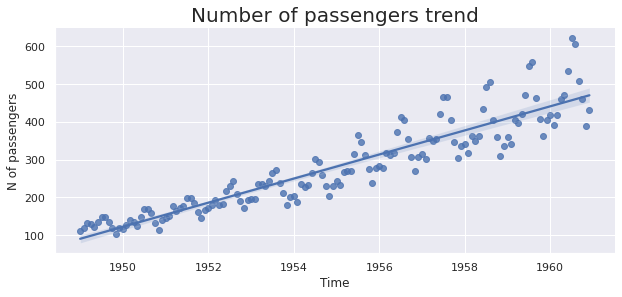

In [8]:
# Visualizing the trend line
ax = sns.lmplot(x='time', y='nPassengers', data=passengers,height=4, aspect=2.2)
plt.title('Number of passengers trend', fontsize=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('N of passengers', fontsize=12)
plt.show()

From the above lines we can extract some informations:


*   The DataSet has 144 records of flights from early 1949 to late 1960 (we are not considering the decimals on the column time).
*   There seems to be a seasonality well defined. A further analyze would be necessary to evaluate the reasons behind that. As our goal is not to define it, I will skip that analyse by moment. 
*   There's a rising trend on number of passengers through the years.

## Preparing the DataSet

The next step is prepare our data to train our model.

That phase involve separete the dataset in two: *train* and *test*.

The *train* dataset will be used to our model learn the trend applying the linear regression - 70% of our dataset will be used to train the model -. While the test dataset will compare the model prediction with the reality - 30% of the Dataset wil be used to test. 

In [9]:
from sklearn import preprocessing

In [10]:
#Select all columns except the last
time = passengers.iloc[:,:-1].values

In [19]:
npassengers = passengers.iloc[:,1].values

In [20]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [21]:
time_train, time_test, npassengers_train, npassengers_test = train_test_split(time, npassengers, 
                                                                                      test_size = 0.3)

In [22]:
from sklearn import linear_model

In [23]:
regressor = linear_model.LinearRegression()

In [25]:
#Fitting the line to training data
regressor.fit(time_train,npassengers_train)

LinearRegression()

In [30]:
predicted_npassengers = regressor.predict(time_test)

## Applying and testing the regression

In [31]:
import numpy as np

In [33]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o Seaborn
# Inserting the data in a dataframe to them plot using seaborn
predicted_passengers = pd.DataFrame({'time': np.ndarray.flatten(time_test),
                                    'nPassengers': predicted_npassengers,})
passengers_test = pd.DataFrame({'time': np.ndarray.flatten(time_test),
                                    'nPassengers': npassengers_test,})


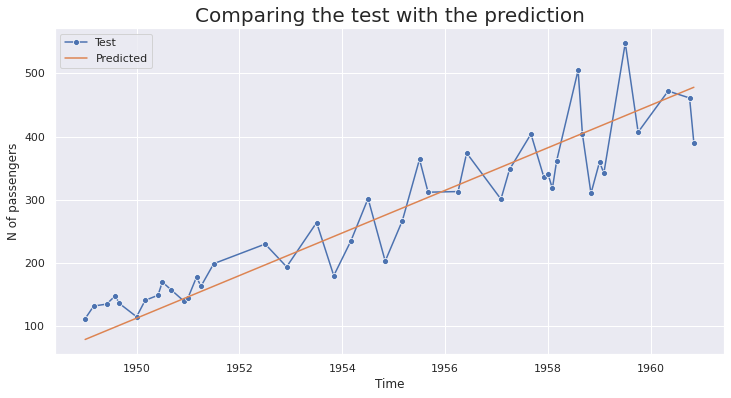

In [38]:
plt.figure(figsize = (12,6))
sns.set(font_scale=1)
sns.lineplot(x="time", y="nPassengers", data = passengers_test,  marker='o', label = "Test")
sns.lineplot(x='time', y='nPassengers', data = predicted_passengers, label = "Predicted" )
plt.title('Comparing the test with the prediction', fontsize=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('N of passengers', fontsize=12)
plt.show()

### Measuring the regression quality

In [40]:
#Extracting angular coefficient from the fit line
regressor.coef_

array([33.70584565])

In [41]:
#Extracting linear coefficient from fit line
regressor.intercept_

-65613.59736149637

In [42]:
from sklearn.metrics import r2_score

In [43]:
# r2_score para a reta ajustada
# r2_score to the fit line 
r2_score(npassengers_test,predicted_npassengers)

0.8339010467045003

SVM

In [44]:
from sklearn.svm import SVR

In [45]:
# Ajusta o modelo de regressão com a máquina de vetor de suport
#Fit regression model with Support Vector Regression 
regressor_svr = SVR( C=1000000)
regressor_svr.fit(time_train,npassengers_train)

SVR(C=1000000)

In [46]:
nPassengers_predicted_svr = regressor_svr.predict(time_test)

In [47]:
passengers_predicted_svr = pd.DataFrame({'time': np.ndarray.flatten(time_test),
                                    'nPassengers': nPassengers_predicted_svr,
             })

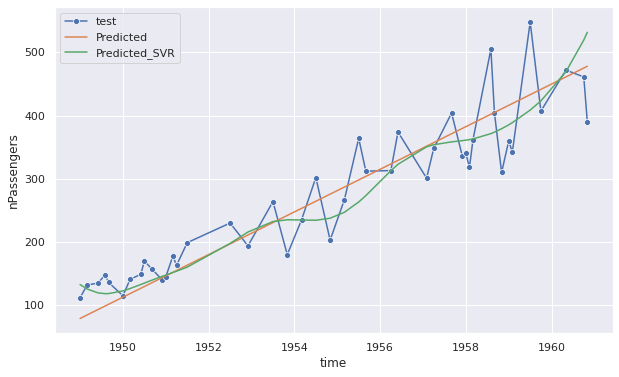

In [48]:
plt.figure(figsize = (10,6))
sns.set(font_scale=1)
sns.lineplot(x="time", y="nPassengers", data = passengers_test,  marker='o', label = "test")
sns.lineplot(x='time', y='nPassengers', data = predicted_passengers, label = "Predicted" )
sns.lineplot(x='time', y='nPassengers', data = passengers_predicted_svr, label = "Predicted_SVR" )

In [50]:
#r2_score to the fitted curve
r2_score(npassengers_test,nPassengers_predicted_svr)

0.8165312711431241